In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as col
import sys
sys.path.append('/pool/firebolt1/p484/projects/huang/rings')
from continuumanalysis3 import Continuum
from fitellipse import *

In [8]:
disk = {'filename': '/data/sandrews/jhfiles/LPfiles/taperedimages/DoAr33_combined_contp3_rob0_taper.image.fits',
                          'distance':139,
                          'incl' : 41.8, 
                          'PA' : 81.1,
                          'offsetx' : 1.49*.003,
                          'offsety' : -0.8*.003,
                          'size': 0.8,
                          'gamma': 1}

cont = Continuum(disk['filename'], disk['offsetx'],disk['offsety'], disk['PA'], disk['incl'], disk['distance'])
maxrad = 40
radialbins = 0.5+1*np.arange(maxrad)
_,_, rtmap = cont.azunwrap(radialbins, tbins = -175 + 10.*np.arange(36))

surfbrightness, SB_scatter = cont.radialprofile(radialbins)


/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1154: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "


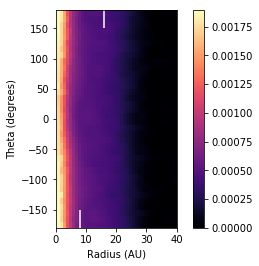

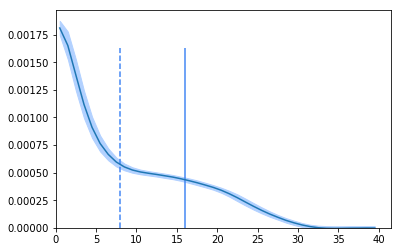

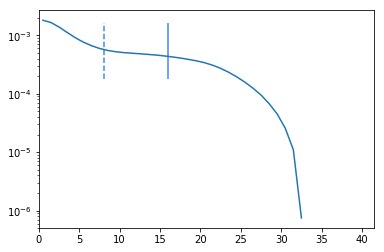

In [16]:
plt.imshow(rtmap,extent =[0.5, np.max(radialbins)+0.5, -180,180], 
           aspect = 0.2, origin = 'lower', cmap = 'magma', norm = col.PowerNorm(gamma = disk['gamma']))
gaps = np.array([8])
rings = np.array([16])
for gap in gaps:
    plt.vlines(gap,-180,-150, color ='white')
for ring in rings:
    plt.vlines(ring,150,180, color ='white')
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=maxrad)
plt.xlim(xmin=0, xmax=maxrad)
plt.colorbar()
plt.xlabel('Radius (AU)')
plt.ylabel('Theta (degrees)')
plt.show()

plt.plot(radialbins, surfbrightness)
plt.fill_between(radialbins,(surfbrightness - SB_scatter),(surfbrightness + SB_scatter),facecolor = '#B2D1FF',edgecolor = '#B2D1FF')
for gap in gaps:
    plt.vlines(gap,np.min(surfbrightness),0.9*np.max(surfbrightness), color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,np.min(surfbrightness),0.9*np.max(surfbrightness), color ='#4286f4')
plt.xlim(xmin = 0)
plt.ylim(ymin =0)
plt.show()


plt.semilogy(radialbins, surfbrightness)
for gap in gaps:
    plt.vlines(gap,0.1*np.max(surfbrightness),0.9*np.max(surfbrightness), color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,0.1*np.max(surfbrightness),0.9*np.max(surfbrightness), color ='#4286f4')
plt.xlim(xmin = 0)
plt.show()

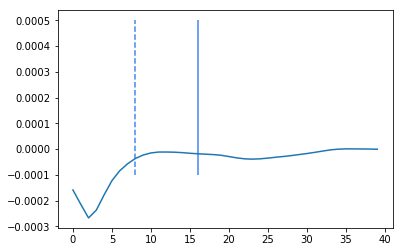

In [20]:
plt.plot(np.gradient(surfbrightness))
for gap in gaps:
    plt.vlines(gap,-1.e-4,5.e-4, color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,-1.e-4,5.e-4, color ='#4286f4')